In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.linear_model import LinearRegression as REGR
from sklearn.metrics import r2_score as r2

In [2]:
df= pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/ironhacklab/week_two/day_4/project/sales.csv")
df.head(20)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0.0,4422.0
1,291687,394,6,2015-04-11,694,1,0,0,0.0,8297.0
2,411278,807,4,2013-08-29,970,1,1,0,0.0,9729.0
3,664714,802,2,2013-05-28,473,1,1,0,0.0,6513.0
4,540835,726,4,2013-10-10,1068,1,1,0,0.0,10882.0
5,687329,674,2,2013-03-19,1016,1,1,0,0.0,8406.0
6,600327,659,7,2014-06-08,0,0,0,0,0.0,0.0
7,96265,27,3,2014-07-16,1106,1,1,0,1.0,11162.0
8,364435,347,6,2013-05-11,448,1,0,0,0.0,5559.0
9,163146,288,2,2013-06-25,291,1,0,0,0.0,3997.0


In [3]:
df.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,354110.000000,354110.000000,354110.000000,354110.000000,354110.000000,354110.000000,354109.000000,354109.000000
mean,356124.890461,557.577623,3.998743,633.589376,0.830222,0.381927,0.178521,5778.294248
std,205292.148252,321.819444,1.996900,464.360611,0.375438,0.485859,0.382952,3856.375506
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178331.250000,279.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3729.000000
50%,356352.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533397.750000,836.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7861.000000
max,712043.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354110 entries, 0 to 354109
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           354110 non-null  int64  
 1   store_ID             354110 non-null  int64  
 2   day_of_week          354110 non-null  int64  
 3   date                 354110 non-null  object 
 4   nb_customers_on_day  354110 non-null  int64  
 5   open                 354110 non-null  int64  
 6   promotion            354110 non-null  int64  
 7   state_holiday        354110 non-null  object 
 8   school_holiday       354109 non-null  float64
 9   sales                354109 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 27.0+ MB


In [5]:
df=pd.DataFrame(df)
df_numric=df.apply(pd.to_numeric, errors='coerce')
df=df.dropna(subset=df_numric.columns)

In [6]:
df.dropna(axis=0, how="any", inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

<Axes: >

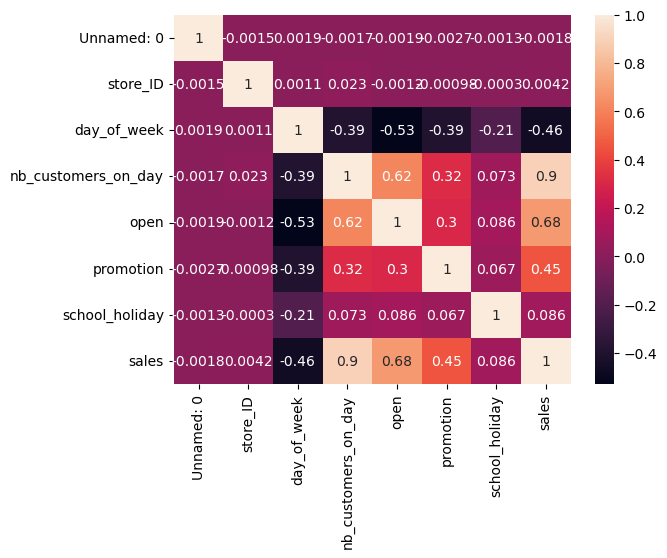

In [8]:
corr = df.drop(['date','state_holiday'],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, annot=True)

In [9]:
df.drop(['Unnamed: 0', 'date', 'state_holiday','day_of_week'], axis=1, inplace=True)
x=df.drop('sales', axis=1)
y=df.sales

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1, random_state=42)

In [11]:
models = [ KNR() , DTR(),RFR() ,REGR()]

<Axes: >

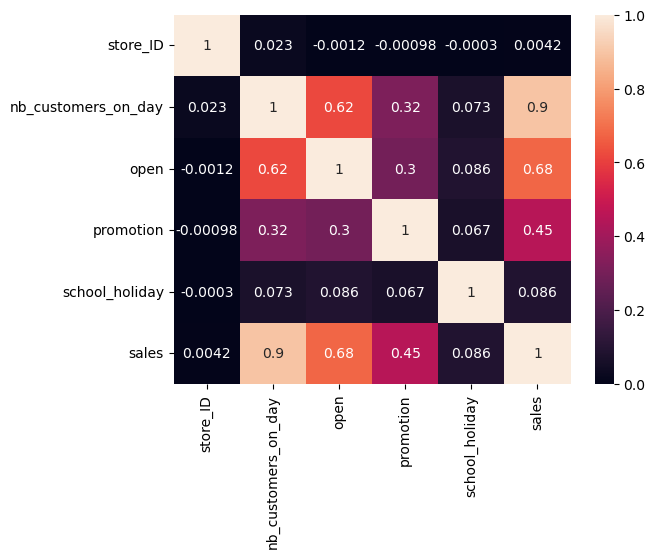

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, annot=True)

KNeighborsRegressor
Model performance for Training set
- Accuracy Score: 0.9352306461636595
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8927393963803274




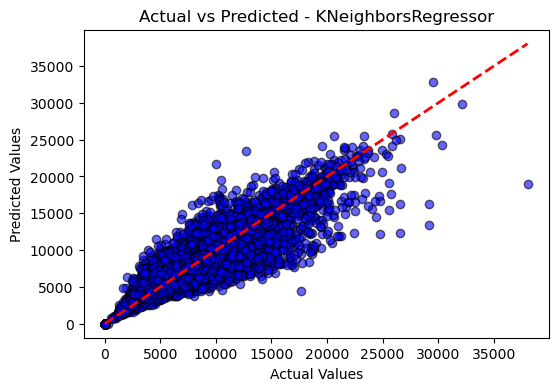

DecisionTreeRegressor
Model performance for Training set
- Accuracy Score: 0.9988300191419259
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9544059355786929




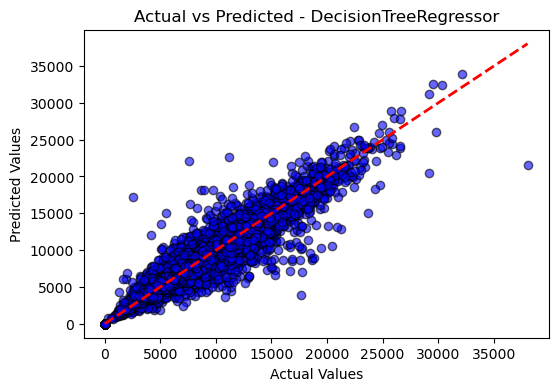

RandomForestRegressor
Model performance for Training set
- Accuracy Score: 0.9948218991881524
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9676437274674692




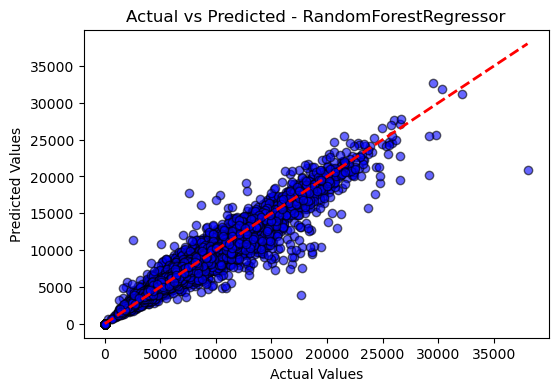

LinearRegression
Model performance for Training set
- Accuracy Score: 0.8524756393849382
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8493834353931291




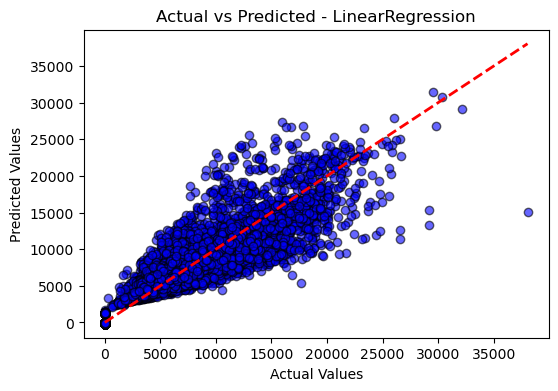

In [13]:
for model in models:
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    r2_train = r2(y_train, y_train_pred)
    r2_test = r2(y_test, y_test_pred)


    print(type(model).__name__)
    print('Model performance for Training set')
    print("- Accuracy Score:", r2_train)
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Accuracy Score:", r2_test)
    print('\n')

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect fit line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {type(model).__name__}")
    plt.show()

In [14]:
rfr=RFR()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [15]:
y_train_predrfr = rfr.predict(x_train)
y_test_predrfr = rfr.predict(x_test)

In [16]:
r2_trainrfr = r2(y_train, y_train_predrfr)
r2_testrfr= r2(y_test, y_test_predrfr)

In [17]:
print('Model performance for Training set')
print("- Accuracy Score:", r2_trainrfr)
print('----------------------------------')
print('Model performance for Test set')
print("- Accuracy Score:", r2_testrfr)

Model performance for Training set
- Accuracy Score: 0.9948510852673378
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9676951473734133


In [18]:
df2= pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/ironhacklab/week_two/day_4/project/REAL_DATA.csv")
df2.head(20)

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0
5,436466,758,4,26/06/2014,569,1,0,0,0
6,646251,563,1,16/02/2015,321,1,1,0,0
7,650464,930,6,22/11/2014,1367,1,0,0,0
8,162710,756,4,04/06/2015,0,0,1,a,0
9,100327,49,2,13/01/2015,546,1,1,0,0


In [19]:
PRED_REAL_DATA= rfr.predict(df2.drop(['index', 'date', 'state_holiday','day_of_week'], axis=1))

In [25]:
df2['pred_salse']=PRED_REAL_DATA

In [21]:
df2.head(20)

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,pred_salse
0,272371,415,7,01/03/2015,0,0,0,0,0,0.000000
1,558468,27,7,29/12/2013,0,0,0,0,0,0.000000
2,76950,404,3,19/03/2014,657,1,1,0,0,5452.630000
3,77556,683,2,29/01/2013,862,1,0,0,0,8425.230000
4,456344,920,3,19/03/2014,591,1,1,0,0,6195.330000
5,436466,758,4,26/06/2014,569,1,0,0,0,3769.320000
6,646251,563,1,16/02/2015,321,1,1,0,0,3951.675000
7,650464,930,6,22/11/2014,1367,1,0,0,0,7399.160000
8,162710,756,4,04/06/2015,0,0,1,a,0,0.000000
9,100327,49,2,13/01/2015,546,1,1,0,0,7695.720000


In [23]:
df2.to_csv("group4")